In [1]:
import numpy as np
import pandas as pd

In [2]:
DATASET_URL = './dataset/Clean_Dataset.csv'

df = pd.read_csv(DATASET_URL)

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df = df.loc[df['class'] == 'Economy']

x = np.array(df['duration'])
y = np.array(df['price'])

y.shape

(206666,)

f(x) = wx + b

Cost = 1/2m [(f(x) - y)^2]

In [4]:
def compute_predict(x : np.array, w : float, b : float) -> float:

    return w * x + b

In [10]:
def compute_cost(x : np.array, y : np.array, w : float, b : float) -> float:

    m = x.shape[0]
    cost = 0

    for i in range(m):
        cost += (compute_predict(x[i], w, b) - y[i])**2 
    
    cost /= 2 * m
    
    return cost
    

w_i = w - a [1/m * (f(x) - y) x]

b_i = w - a [1/m * (f(x) - y)]

In [6]:
def compute_gradient(x : np.array, y : np.array, w : float, b : float, learning_rate : int,
                     threshold : int, compute_predict_func : compute_predict, compute_cost: compute_cost):

    w_i = w
    b_i = b
    m = x.shape[0]

    old_cost = compute_cost(x, y, w_i, b_i)

    for i in range(threshold):

        dy_w = 0
        dy_b = 0

        for j in range(m):
            
            dy_w += (((w_i * x[j] + b_i) - y[j]) * x[j])
            dy_b += ((w_i * x[j] + b_i) - y[j])
        
        dy_w /= m
        dy_b /= m

        w_i -= learning_rate * dy_w 
        b_i -= learning_rate * dy_b

        new_cost = compute_cost(x, y, w_i, b_i)

        if new_cost >= old_cost:
            break
        
        if (i % 10 == 0):
            print(f'Iteration-{i}, w = {w_i} | b = {b_i} | cost = {new_cost} ')

        old_cost = new_cost
    
    return w_i, b_i
    

In [11]:
w = 1406.5003811172278 
b = 219.69249812670935 
a = 0.01
threshold = 10000
epsilon = 0.0001

optimal_w, optimal_b = compute_gradient(x, y, w, b, a, threshold, compute_predict, compute_cost)

Iteration-0, w = -395.4293626234082 | b = 120.76736518217628 | cost = 74904746.87541914 
Iteration-10, w = 234.8527881528832 | b = 290.32574753315635 | cost = 12987589.511146039 
Iteration-20, w = 377.7183974451277 | b = 425.9279082024951 | cost = 9385614.784655597 
Iteration-30, w = 405.66649289433764 | b = 550.8603491300048 | cost = 9042744.125885617 
Iteration-40, w = 406.64223867424397 | b = 670.6947989630222 | cost = 8889334.40276601 
Iteration-50, w = 401.4056766359488 | b = 786.8183556195315 | cost = 8753837.563391741 
Iteration-60, w = 394.85407324128556 | b = 899.6281086641716 | cost = 8626287.994017685 
Iteration-70, w = 388.139497813121 | b = 1009.2854681602312 | cost = 8505749.788572535 
Iteration-80, w = 381.5298680988415 | b = 1115.8943208327046 | cost = 8391811.236974785 
Iteration-90, w = 375.0844608209054 | b = 1219.5431461555188 | cost = 8284109.531578201 
Iteration-100, w = 368.81340150739345 | b = 1320.3150109349385 | cost = 8182303.193895015 
Iteration-110, w = 362

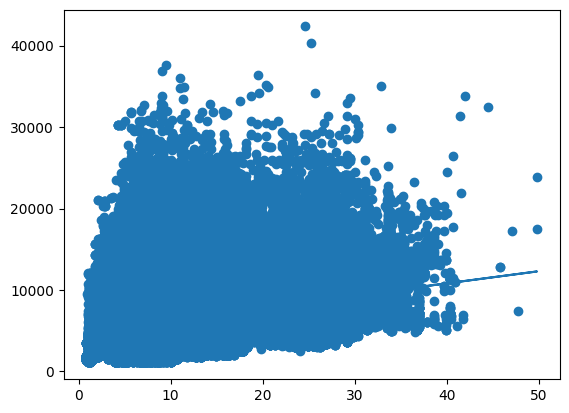

In [12]:
from matplotlib import pyplot as plt

plt.scatter(x, y)
plt.plot(x, compute_predict(x, optimal_w, optimal_b))
plt.show()


In [13]:
# Prediction

x_test = 34.21

y_pred = compute_predict(x_test, optimal_w, optimal_b)

print(f'Flight Price Prediction: {y_pred}')



Flight Price Prediction: 9950.59444812301
